## Power Loss In MiniGrid


### Assumptions

Using the data provided, compute the total energy lost, in kWh, due to power line resistance during the period data was collected. You may assume the following:

- The distribution is entirely in a low-voltage wye configuration.
- The conductors used as the power lines are identical, and each has a resistance of 3 Ohms.
- The load can be modeled as a point load at the end of the power lines.
- The imaginary component of the power line impedance is negligible (e.g. you may ignore inductance).


To compute the power loss in a distribution network, especially in the context of I²R (resistive) losses, we can use the following approach. The power loss is primarily caused by the resistance of the conductors and can be calculated using the formula:

𝑃ower Loss = Current (I)^2 \* Resistance (R)

Where:

- Power Loss is the power loss due to resistance (in watts).

- I is the current flowing through the conductor (in amperes).

- R is the resistance of the conductor (in ohms).


#### Import requirement libraries


In [1]:
import openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Importation


In [2]:
# Load the Excel data
data = pd.read_excel("./Renewvia Interview Minigrid Log.xlsx", header=None)

#### Data Exploration


In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,timestamp,VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],...,VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276],VE.Bus System [276]
1,Africa/Lagos (+01:00),Phase rotation,Input voltage phase 1,Input voltage phase 2,Input voltage phase 3,Input current phase 1,Input current phase 2,Input current phase 3,Input frequency 1,Input frequency 2,...,Overload L2,High DC Ripple L2,Temperature L3,Low battery L3,Overload L3,High DC Ripple L3,Charge state,Temperatur sensor alarm,Voltage sensor alarm,High DC Ripple
2,NaN,NaN,V,V,V,A,A,A,Hz,Hz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-13 00:13:00,Ok,0,0,0,0,0,0,0,0,...,Ok,Ok,Ok,Ok,Ok,Ok,Bulk,Ok,Ok,Ok
4,2022-11-13 00:28:00,Ok,0,0,0,0,0,0,0,0,...,Ok,Ok,Ok,Ok,Ok,Ok,Bulk,Ok,Ok,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,2022-11-19 22:58:00,Ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ok,Ok,Ok,Ok,Ok,Ok,NaN,Ok,Ok,Ok
1270,2022-11-19 23:13:00,Ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ok,Ok,Ok,Ok,Ok,Ok,NaN,Ok,Ok,Ok
1271,2022-11-19 23:28:00,Ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ok,Ok,Ok,Ok,Ok,Ok,NaN,Ok,Ok,Ok
1272,2022-11-19 23:43:00,Ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ok,Ok,Ok,Ok,Ok,Ok,NaN,Ok,Ok,Ok


In [4]:
data.shape

(1274, 52)

In [5]:
# Dropping the first row (header)
data = data.drop(data.index[0])

# Setting the new first row as the header
data.columns = data.iloc[0]  # Assigning the second row as the header
data = data.drop(data.index[0])  # Dropping the new header row from the data
data = data.drop(data.index[0])  # Dropping the row with the units

data.head()

1,Africa/Lagos (+01:00),Phase rotation,Input voltage phase 1,Input voltage phase 2,Input voltage phase 3,Input current phase 1,Input current phase 2,Input current phase 3,Input frequency 1,Input frequency 2,...,Overload L2,High DC Ripple L2,Temperature L3,Low battery L3,Overload L3,High DC Ripple L3,Charge state,Temperatur sensor alarm,Voltage sensor alarm,High DC Ripple
3,2022-11-13 00:13:00,Ok,0,0,0,0,0,0,0,0,...,Ok,Ok,Ok,Ok,Ok,Ok,Bulk,Ok,Ok,Ok
4,2022-11-13 00:28:00,Ok,0,0,0,0,0,0,0,0,...,Ok,Ok,Ok,Ok,Ok,Ok,Bulk,Ok,Ok,Ok
5,2022-11-13 00:43:00,Ok,0,0,0,0,0,0,0,0,...,Ok,Ok,Ok,Ok,Ok,Ok,Bulk,Ok,Ok,Ok
6,2022-11-13 00:58:00,Ok,0,0,0,0,0,0,0,0,...,Ok,Ok,Ok,Ok,Ok,Ok,Bulk,Ok,Ok,Ok
7,2022-11-13 01:13:00,Ok,0,0,0,0,0,0,0,0,...,Ok,Ok,Ok,Ok,Ok,Ok,Bulk,Ok,Ok,Ok


#### Preprocessing the Dataset


In [6]:
# Checking for missing values in the minigrid dataset
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_data = missing_data.reset_index(drop=False)
missing_data = missing_data.rename(columns={"index": "columns", 0: "value"})
missing_data["proportion"] = (
    missing_data["value"] / len(data)
) * 100  # getting the proportion of missing values

missing_data = missing_data[
    missing_data["value"] > 0
]  # getting columns with missing values
missing_data

,1,value,proportion
0,VE.Bus state of charge,1251,98.426436
1,Battery temperature,494,38.867034
2,Input power 3,453,35.641227
3,Active input,453,35.641227
4,Output power 3,453,35.641227
5,Output power 2,453,35.641227
6,Output power 1,453,35.641227
7,Output current phase 3,453,35.641227
8,Output current phase 2,453,35.641227
9,Output current phase 1,453,35.641227


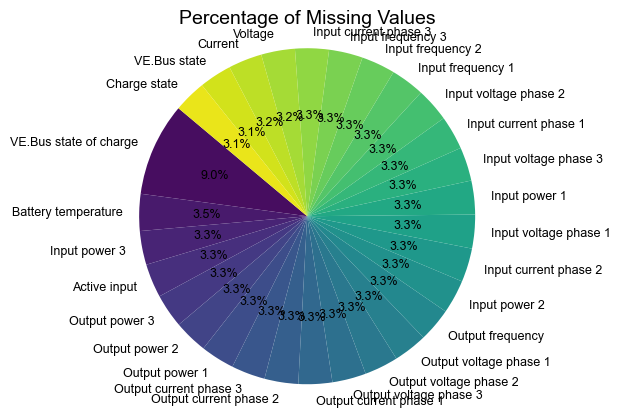

In [7]:
# Filter the sample data
sample = missing_data[missing_data["proportion"] > 10]

# Create pie chart
fig, ax = plt.subplots()

# Plot pie chart
wedges, texts, autotexts = ax.pie(
    sample["proportion"],
    labels=sample[1],
    autopct="%1.1f%%",
    colors=sns.color_palette("viridis", len(sample)),
    startangle=140,
)


for text in texts + autotexts:
    text.set_fontsize(9)
    text.set_family("Arial")
    text.set_color("#000000")

# Title and layout
plt.title(
    "Percentage of Missing Values",
    fontsize=14,
    family="Arial",
)
plt.axis("equal")
fig.patch.set_facecolor("white")

# Show the plot
plt.show()

In [8]:
# Dropping rows with missing values (or you can choose to fill them, depending on your needs)
data_cleaned = data.dropna(axis=1)

In [9]:
data

1,Africa/Lagos (+01:00),Phase rotation,Input voltage phase 1,Input voltage phase 2,Input voltage phase 3,Input current phase 1,Input current phase 2,Input current phase 3,Input frequency 1,Input frequency 2,...,Overload L2,High DC Ripple L2,Temperature L3,Low battery L3,Overload L3,High DC Ripple L3,Charge state,Temperatur sensor alarm,Voltage sensor alarm,High DC Ripple
3,2022-11-13 00:13:00,Ok,0,0,0,0,0,0,0,0,...,Ok,Ok,Ok,Ok,Ok,Ok,Bulk,Ok,Ok,Ok
4,2022-11-13 00:28:00,Ok,0,0,0,0,0,0,0,0,...,Ok,Ok,Ok,Ok,Ok,Ok,Bulk,Ok,Ok,Ok
5,2022-11-13 00:43:00,Ok,0,0,0,0,0,0,0,0,...,Ok,Ok,Ok,Ok,Ok,Ok,Bulk,Ok,Ok,Ok
6,2022-11-13 00:58:00,Ok,0,0,0,0,0,0,0,0,...,Ok,Ok,Ok,Ok,Ok,Ok,Bulk,Ok,Ok,Ok
7,2022-11-13 01:13:00,Ok,0,0,0,0,0,0,0,0,...,Ok,Ok,Ok,Ok,Ok,Ok,Bulk,Ok,Ok,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,2022-11-19 22:58:00,Ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ok,Ok,Ok,Ok,Ok,Ok,NaN,Ok,Ok,Ok
1270,2022-11-19 23:13:00,Ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ok,Ok,Ok,Ok,Ok,Ok,NaN,Ok,Ok,Ok
1271,2022-11-19 23:28:00,Ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ok,Ok,Ok,Ok,Ok,Ok,NaN,Ok,Ok,Ok
1272,2022-11-19 23:43:00,Ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ok,Ok,Ok,Ok,Ok,Ok,NaN,Ok,Ok,Ok


### Power Loss


In [13]:
# Extracting the column of interest
current = data["Current"]
resistance = 3  #  Ohms (Ω) The resistance of each power line

In [27]:
#### Calculate the power loss in the power lines
data["Power Loss"] = (current**2) * resistance

In [31]:
power_loss = data["Power Loss"].sum()

# Converting from Joules to KWh
power_loss_kwh = power_loss / 3600000

print(f"The total power loss in the power lines is {power_loss_kwh} KWh")

The total power loss in the power lines is 3.814420733333331 KWh
